Environment setup

In [2]:
pip install pandas scikit-learn matplotlib seaborn


Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


Load the data

In [4]:
# Load train and test datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check first few rows
print("Train Data Sample:")
print(train_df.head())

print("\nTest Data Sample:")
print(test_df.head())



Train Data Sample:
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740  

Explore the data

In [5]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (576, 12)
Test shape: (120, 12)


In [6]:
print("Train columns:", train_df.columns)
print("Test columns:", test_df.columns)


Train columns: Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')
Test columns: Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')


In [7]:
print("Missing in train:\n", train_df.isnull().sum())
print("\nMissing in test:\n", test_df.isnull().sum())


Missing in train:
 profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

Missing in test:
 profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Understand target and features

In [10]:
print(train_df['fake'].value_counts())

fake
0    288
1    288
Name: count, dtype: int64


In [12]:
label_map = {'genuine': 0, 'spam': 1, 'fake': 2}
train_df['label_encoded'] = train_df['fake'].map(label_map)


Select features & target

In [14]:
features = ['#followers', '#follows', '#posts']

X_train = train_df[features]
y_train = train_df['fake']  # or 'label' if you renamed it

X_test = test_df[features]


Train the machine learning model

In [15]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Predict on test data

In [16]:
test_predictions = model.predict(X_test)


In [17]:
reverse_map = {0: 'genuine', 1: 'spam', 2: 'fake'}
test_df['predicted_label'] = [reverse_map[p] for p in test_predictions]


Evaluation of test lables

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test = test_df['fake']

print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Report:\n", classification_report(y_test, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))


Accuracy: 0.7833333333333333
Report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75        60
           1       0.72      0.92      0.81        60

    accuracy                           0.78       120
   macro avg       0.81      0.78      0.78       120
weighted avg       0.81      0.78      0.78       120

Confusion Matrix:
 [[39 21]
 [ 5 55]]


Visualize predictions

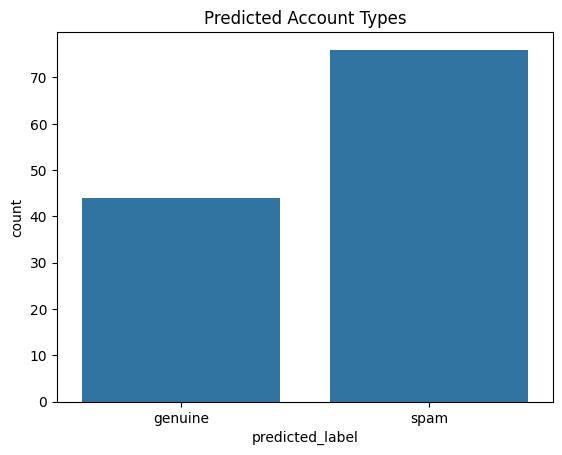

In [20]:
sns.countplot(x='predicted_label', data=test_df)
plt.title('Predicted Account Types')
plt.show()


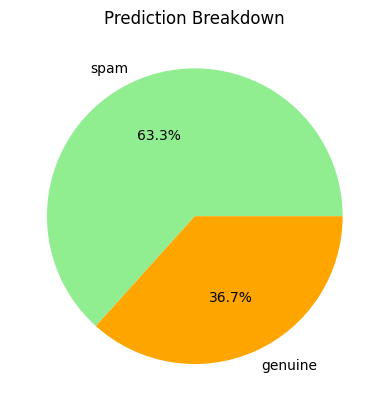

In [21]:
test_df['predicted_label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'orange', 'red'])
plt.title('Prediction Breakdown')
plt.ylabel('')
plt.show()


Save the results

In [22]:
test_df.to_csv('test_with_predictions.csv', index=False)
print("Predictions saved to test_with_predictions.csv")


Predictions saved to test_with_predictions.csv
